In [1]:
from fortunes import *
from random import uniform
from visualizer.main import Visualizer
from delaunay import *

In [11]:
# editable

def gen_points(number_of_points, bound=2):
    list = []
    for _ in range(number_of_points):
        list.append(Point(uniform(0,10**bound),uniform(0,10 ** bound)))
    return list, bound

points, bound = gen_points(number_of_points=10, bound=3)  #tutaj wybierz liczbę punktów oraz ich zakres. Np: gen_points(15,3) 
                                                        #wygeneruje 15 punktów o współrzednych w zakresie (0,10^3).


Triangulacja Delaunay oraz Diagram Woronoja wyznaczony za pomocą algorytmu Bowyera-Watsona (algorytm iteracyjny)

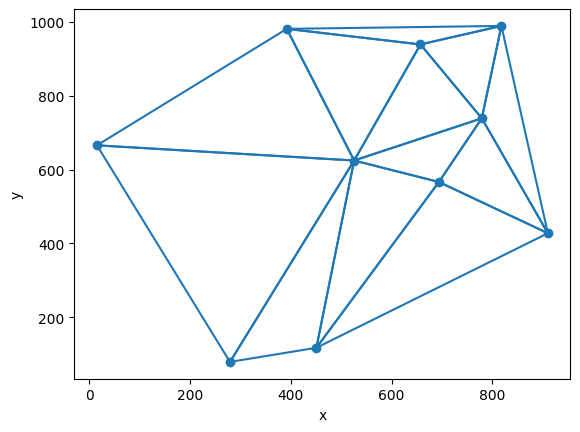

In [12]:
# triangulacja Delaunay

delaunay = DelaunayTriangulation(points)
triangulation = delaunay.run()

vis = Visualizer()
vis.add_point([p.get() for p in points])
for triangle in triangulation:
    for edge in triangle.edges:
        vis.add_line_segment((edge.p1.get(), edge.p2.get()))

vis.show()

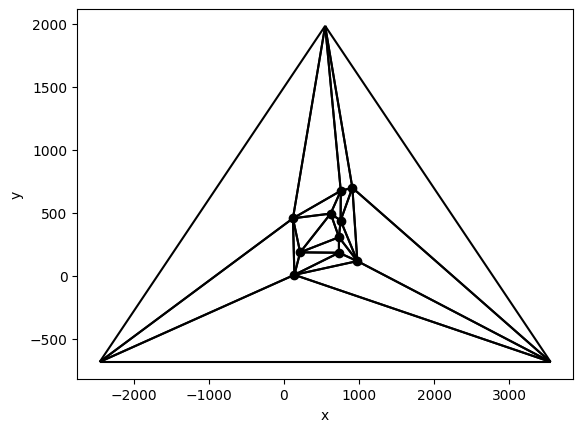

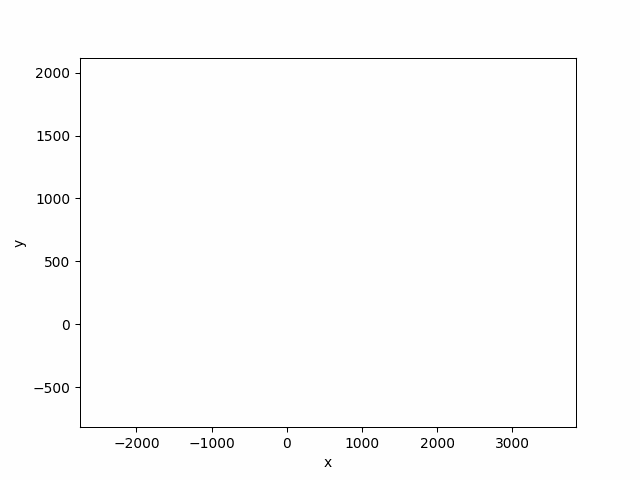

In [4]:
# triangulacja Delaunay z wizualizacją krokową
# czerwony punkt - obecnie dodany do rozważania punkt
# brązowe krawedzie - obecnie przeszukiwany trójkąt
# niebieskie krawędzie - sąsiedztwo trójkąta zawierającego punkt
# żółte krawędzie - otoczka sąsiedztwa
# czarne krawędzie - obecny stan triangulacji

delaunay = DelaunayTriangulation(points)
_, vis = delaunay.run_with_visualisation()
vis.show_gif(interval=300)

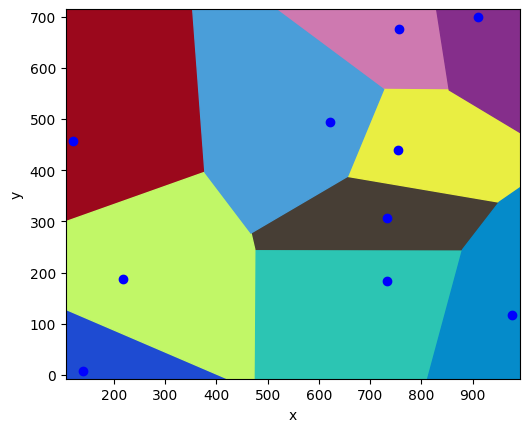

In [5]:
# diagram Woronoja
from matplotlib import pyplot as plt
import numpy as np

delaunay = DelaunayTriangulation(points)
delaunay.run(clean_up=False)
voronoi_diagram = VoronoiDiagram(points, delaunay.neighbours, delaunay.triangulation)
plygon_list = voronoi_diagram.create_diagram()
vis_diagram = Visualizer()

for polygon in plygon_list:
    vis_diagram.add_polygon(polygon.data, color=np.random.rand(3, ))

# find boundaries for diagram
min_x, max_x, min_y, max_y = voronoi_diagram.create_boundary_for_points()
vis_diagram.add_point([p.get() for p in points], color="blue")


vis_diagram.show()
plt.xlim(min_x - 15, max_x + 15)
plt.ylim(min_y - 15, max_y + 15)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

Diagram Woronoja wyznaczony za pomocą algorytmu Fortune'a

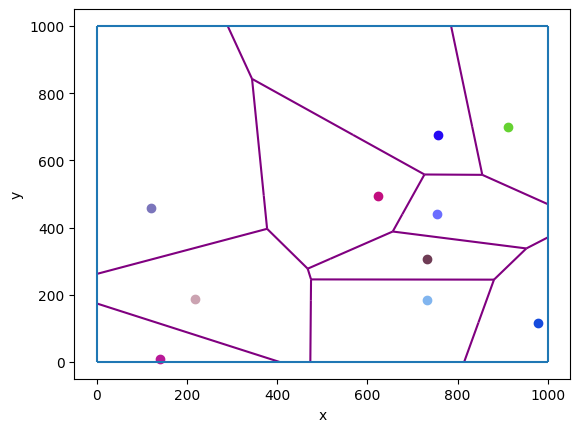

In [6]:
fortune = FortuneAlgorithm(points, bound)
fortune.visualize()

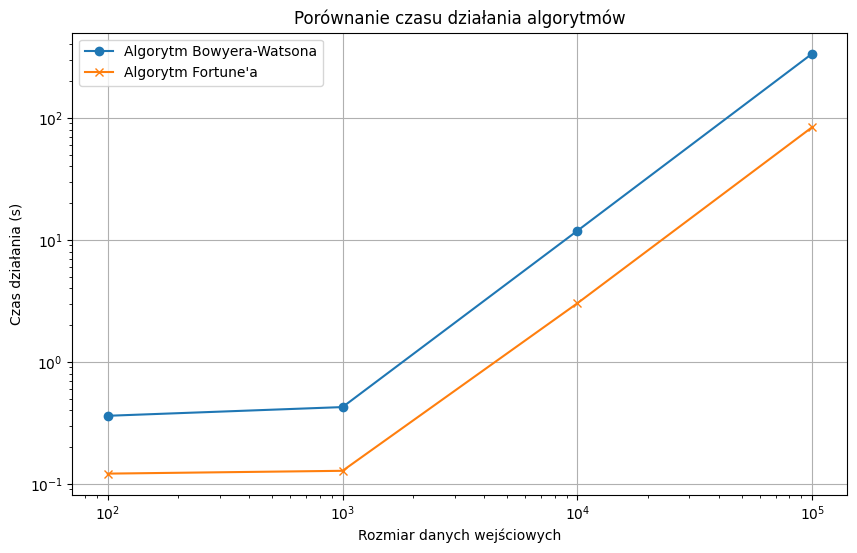

In [14]:
import time
# check running time for both algorthims
input_size = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]

# bowyer - watson
bowyer_watson_times = []
for size in input_size:
    points, _ = gen_points(size)
    start_time = time.time()
    delaunay = DelaunayTriangulation(points)
    delaunay.run(clean_up=False)
    end_time = time.time()
    bowyer_watson_times.append(end_time - start_time)

# fortune's algorithm
fortune_times = []
for size in input_size:
    points, _ = gen_points(size)
    start_time = time.time()
    fortune_algoprithm = FortuneAlgorithm(points, bound)
    fortune_algoprithm.process()
    segments = fortune_algoprithm.get_output()
    end_time = time.time()
    fortune_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_size, bowyer_watson_times, label='Algorytm Bowyera-Watsona', marker='o')
plt.plot(input_size, fortune_times, label="Algorytm Fortune'a", marker='x')
plt.xlabel('Rozmiar danych wejściowych')
plt.ylabel('Czas działania (s)')
plt.xscale('log')
plt.yscale('log')
plt.title('Porównanie czasu działania algorytmów')
plt.legend()
plt.grid(True)
plt.show()